# 월별 노인 교통 사고
- 출처) 도로교통공단.
1. 노인은 65세 이상임
2. 부상자수는 중상자수，경상자수，부상신고자수의 합계.	

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data\\month.csv',encoding='CP949',header=1)

In [13]:
df.head()

,시군구,합계,01월,02월,03월,04월,05월,06월,07월,08월,...,03월.9,04월.9,05월.9,06월.9,07월.9,08월.9,09월.9,10월.9,11월.9,12월.9
0,합계,11640,857,871,868,899,994,1000,928,912,...,1918,2099,2257,1990,2090,2194,2178,2501,2582,2259
1,종로구,410,24,30,29,38,27,29,36,37,...,54,68,62,49,62,62,54,86,69,66
2,중구,381,33,34,28,33,27,36,36,24,...,56,62,84,57,52,65,60,69,73,65
3,용산구,419,54,30,37,30,31,33,27,31,...,71,61,77,73,67,76,58,83,80,69
4,성동구,364,25,23,34,29,35,25,31,21,...,56,68,80,77,62,65,83,82,83,80


In [4]:
# 연도별 데이터 쪼개기 (2015~2019)
df_2015 = df.loc[:,'01월.5':'12월.5']
df_2016 = df.loc[:,'01월.6':'12월.6']
df_2017 = df.loc[:,'01월.7':'12월.7']
df_2018 = df.loc[:,'01월.8':'12월.8']
df_2019 = df.loc[:,'01월.9':'12월.9']
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019]

In [14]:
df_2015.head()

,01월.5,02월.5,03월.5,04월.5,05월.5,06월.5,07월.5,08월.5,09월.5,10월.5,11월.5,12월.5
0,1436,1371,1611,1455,1548,1347,1513,1565,1730,1877,1758,1693
1,41,36,38,42,57,36,45,49,48,68,52,59
2,45,30,82,53,51,46,40,58,49,53,64,59
3,50,51,75,50,56,45,54,53,64,66,59,56
4,52,58,42,37,43,43,59,61,52,75,53,47


In [6]:
df.iloc[1,0]

'종로구'

In [15]:
# 근 5년간 사고 건수가 많은 자치구 Top 5 구하기
df_2015_total = df.loc[:,'합계.5'] 
df_2016_total = df.loc[:,'합계.6'] 
df_2017_total = df.loc[:,'합계.7'] 
df_2018_total = df.loc[:,'합계.8'] 
df_2019_total = df.loc[:,'합계.9'] 

df_total = pd.concat([df_2015_total,df_2016_total,df_2017_total,df_2018_total,df_2019_total], axis=1)
df_total.head()

,합계.5,합계.6,합계.7,합계.8,합계.9
0,18904,20254,22101,25163,25983
1,571,617,658,750,732
2,630,615,673,757,766
3,679,695,694,839,840
4,622,616,763,821,862


In [8]:
df_total['sum'] = df_total.sum(axis=1) # 근 5년간 사고건수 합 컬럼 추가
df_top5 = df_total.sort_values('sum',ascending=False).head(6) # 오름차순 정렬 후 top 5개 골라내기
df_top5.drop(0, inplace=True) # '합계 row' 필터링
df_top5_name = df.iloc[df_top5.index,0]
df_top5_name

16     강남구
19     서초구
18     송파구
13    영등포구
11     강서구
Name: 시군구, dtype: object

In [9]:
df_top5

,합계.5,합계.6,합계.7,합계.8,합계.9,sum
16,1377,1505,1786,2124,2263,9055
19,1220,1333,1479,1756,1845,7633
18,1043,1112,1264,1475,1575,6469
13,1022,1124,1203,1349,1341,6039
11,893,1017,1141,1292,1410,5753


In [10]:
list(df_top5_name.index)

[16, 19, 18, 13, 11]

강남구


<Figure size 432x288 with 0 Axes>

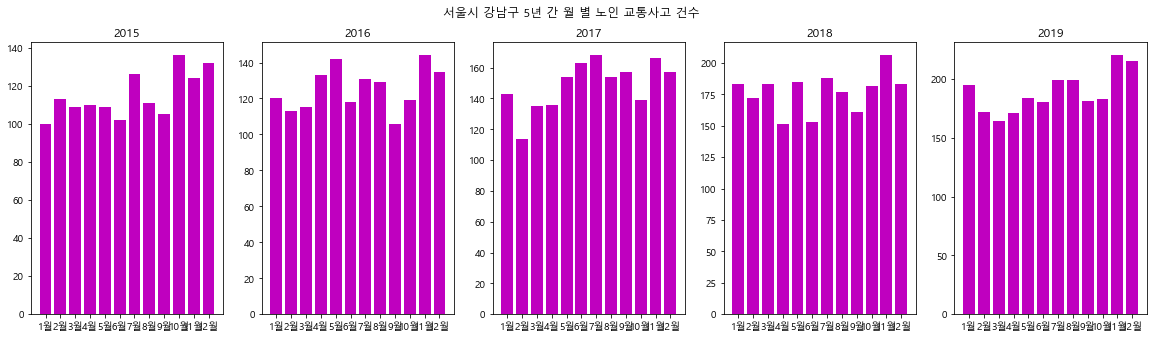

서초구


<Figure size 432x288 with 0 Axes>

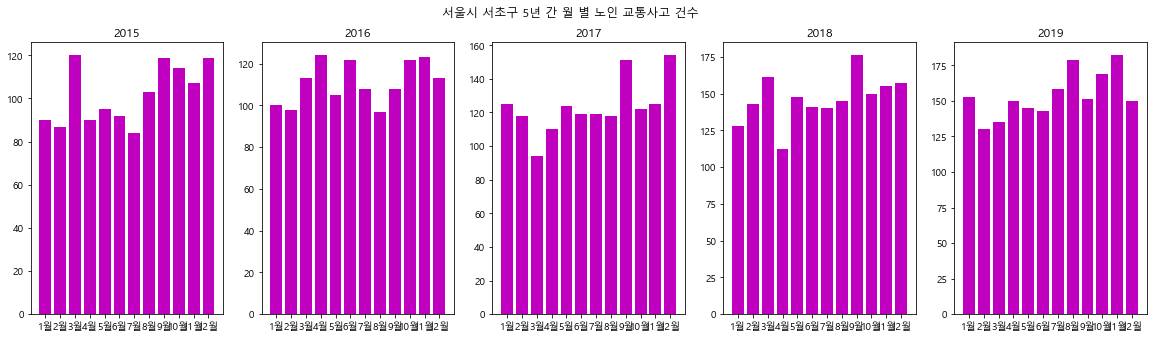

송파구


<Figure size 432x288 with 0 Axes>

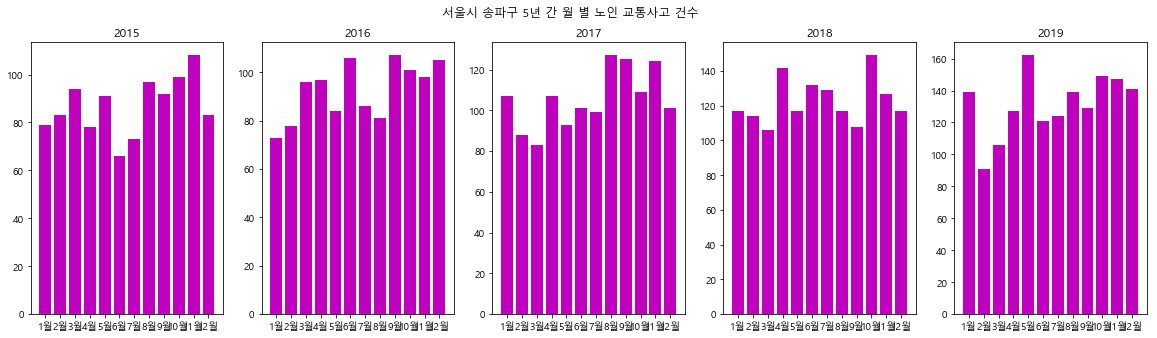

영등포구


<Figure size 432x288 with 0 Axes>

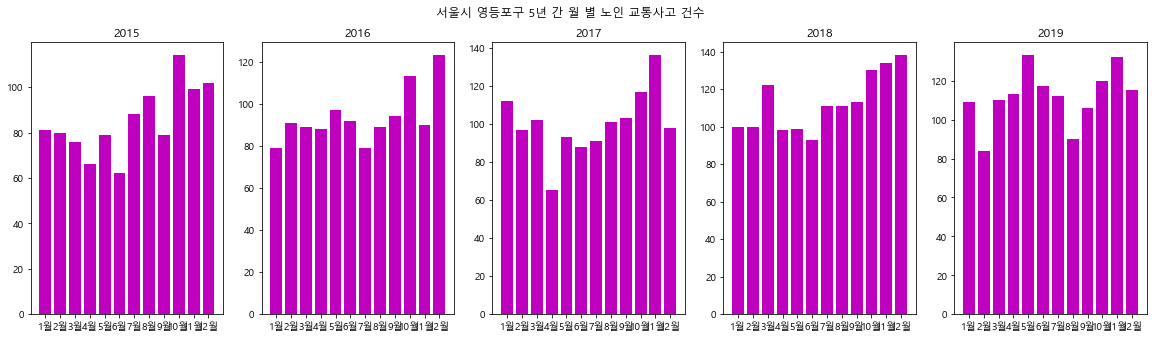

강서구


<Figure size 432x288 with 0 Axes>

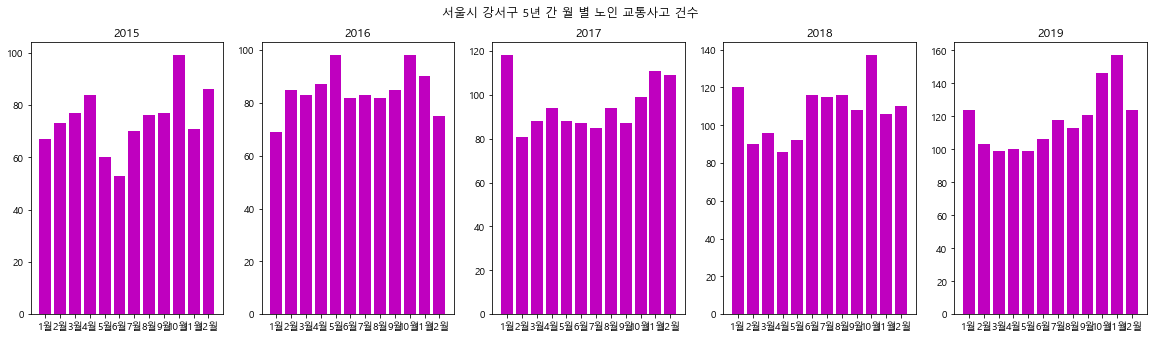

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
index = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
year_list= [ 2015,2016,2017,2018,2019]

for gu in list(df_top5_name.index):
#     print(gu)
    print(df.iloc[gu,0])
    plt.figure()
    plt.figure(figsize=[20,5])
    for i, val in enumerate(year_list):
        plt.subplot(1,5,i+1).set_title(val)
        plt.bar(index, df_list[i].iloc[gu], color='m')
    title = '서울시 {} 5년 간 월 별 노인 교통사고 건수'.format(df.iloc[gu,0])
    plt.suptitle(title)        
    plt.show()

2015


<Figure size 432x288 with 0 Axes>

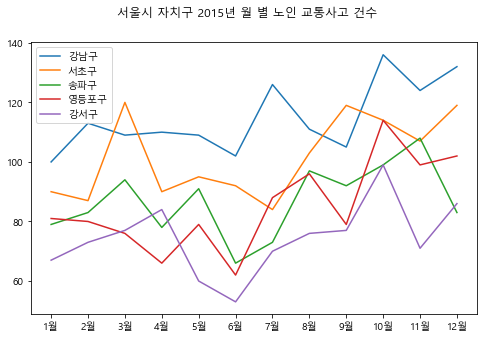

2016


<Figure size 432x288 with 0 Axes>

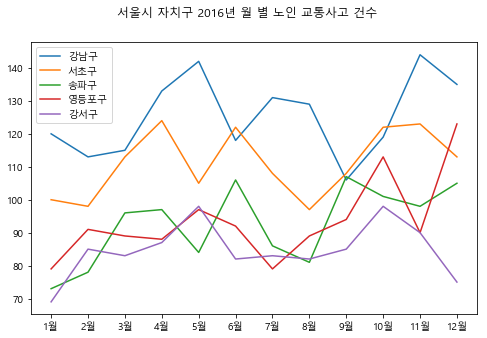

2017


<Figure size 432x288 with 0 Axes>

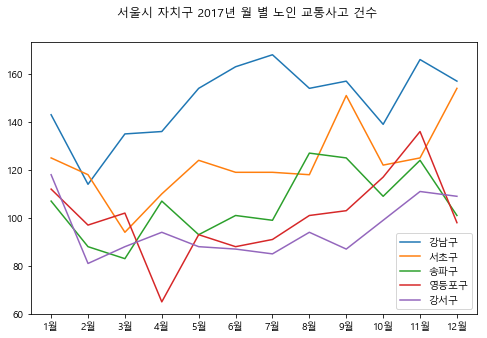

2018


<Figure size 432x288 with 0 Axes>

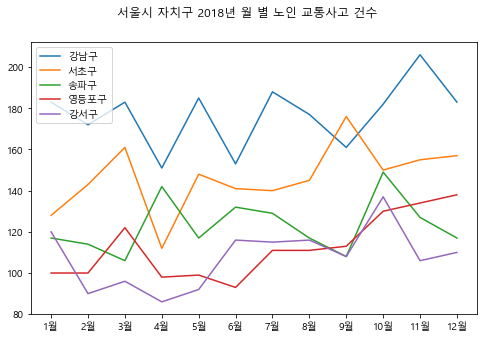

2019


<Figure size 432x288 with 0 Axes>

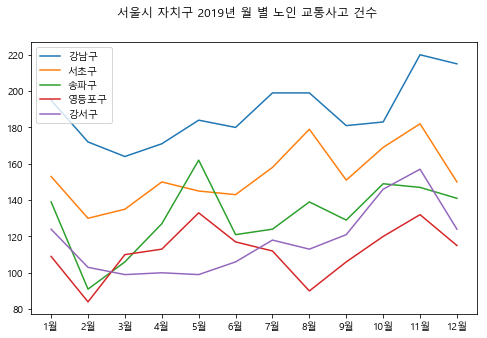

In [29]:
for i, val in enumerate(year_list):
    print(val)
    plt.figure()
    plt.figure(figsize=[8,5])
    for gu in list(df_top5_name.index):
        plt.plot(index, df_list[i].iloc[gu])
    title = '서울시 자치구 {}년 월 별 노인 교통사고 건수'.format(str(val))
    plt.suptitle(title)        
    plt.legend(['강남구','서초구','송파구','영등포구','강서구'])
    plt.show()